# DATASET OVERVIEW

# Plots

* Number of Samples vs Native Sample Rate - Total
* Number of Samples vs Classes
* Number of Samples vs Native Sample Rates - Each Class

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
from processing import preprocessing

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
metadata = preprocessing.extend_metadata()  # add sample_rate column to metadata
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class,sample_rate
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,44100
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,44100
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,44100
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,44100
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,44100
...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn,44100
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,44100
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,44100
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,44100


In [4]:
audiodf = preprocessing.create_audiodf()
audiodf

,num_channels,sample_rate,bit_depth
0,2,44100,16
1,2,44100,16
2,2,44100,16
3,2,44100,16
4,2,44100,16
...,...,...,...
8727,2,44100,16
8728,2,44100,16
8729,2,44100,16
8730,2,44100,16


In [5]:
# Examine one type of class
metadata.loc[metadata['class'] == 'siren']

,slice_file_name,fsID,start,end,salience,fold,classID,class,sample_rate
114,102853-8-0-0.wav,102853,0.000000,4.000000,2,7,8,siren,44100
115,102853-8-0-1.wav,102853,0.500000,4.500000,2,7,8,siren,44100
116,102853-8-0-2.wav,102853,1.000000,5.000000,2,7,8,siren,44100
117,102853-8-0-3.wav,102853,1.500000,5.500000,2,7,8,siren,44100
118,102853-8-0-4.wav,102853,2.000000,6.000000,2,7,8,siren,44100
...,...,...,...,...,...,...,...,...,...
8574,96657-8-0-1.wav,96657,122.837051,126.837051,2,8,8,siren,44100
8575,96657-8-0-2.wav,96657,123.337051,127.337051,2,8,8,siren,44100
8576,96657-8-0-3.wav,96657,123.837051,127.837051,2,8,8,siren,44100
8642,98525-8-0-0.wav,98525,0.000000,4.000000,1,7,8,siren,44100


In [6]:
# Sort unique class names based on ClassID (0,1,2 ... 9)
classID = metadata.classID.unique().tolist()
classNames = metadata["class"].unique().tolist()
labels_sorted = [x for _, x in sorted(zip(classID, classNames))]

for class_ID, label in enumerate(labels_sorted):
    print(class_ID, label)

0 air_conditioner
1 car_horn
2 children_playing
3 dog_bark
4 drilling
5 engine_idling
6 gun_shot
7 jackhammer
8 siren
9 street_music


## Plot Number of Samples vs Native Sample Rate

In [7]:
# A total of 11 different sample rates (ranging from 96kHz to 8kHz) are present
metadata["sample_rate"].unique()

array([ 44100,  48000,  96000,  22050,  16000,  11025, 192000,  32000,
        11024,  24000,   8000])

In [8]:
audiodf.sample_rate.value_counts()

44100     5370
48000     2502
96000      610
24000       82
16000       45
22050       44
11025       39
192000      17
8000        12
11024        7
32000        4
Name: sample_rate, dtype: int64

In [9]:
sample_rate_counts = metadata.sample_rate.value_counts().tolist()
native_sample_rates = metadata["sample_rate"].value_counts().index.tolist()

# Sort counts in ascending order of sample rates
rates_sorted = sorted(native_sample_rates)
counts_sorted = [x for _, x in sorted(zip(native_sample_rates, sample_rate_counts))]

print("Sorted native sample rates: ", rates_sorted)
print("Sorted sample rate counts: ", counts_sorted)

Sorted native sample rates:  [8000, 11024, 11025, 16000, 22050, 24000, 32000, 44100, 48000, 96000, 192000]
Sorted sample rate counts:  [12, 7, 39, 45, 44, 82, 4, 5370, 2502, 610, 17]


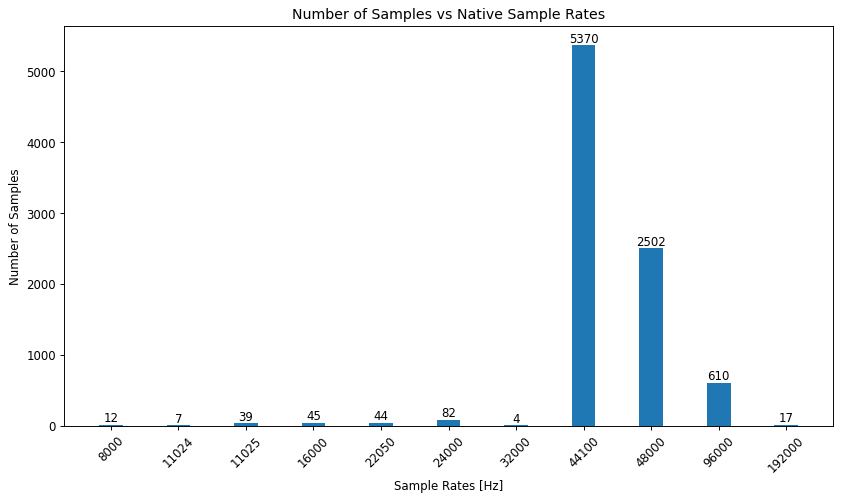

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=85)
width = 0.35

types = np.arange(0, 11)
ax.bar(types - width/2, counts_sorted, width, align="edge")
ax.set_ylabel("Number of Samples")
ax.set_xlabel("Sample Rates [Hz]")
ax.set_title("Number of Samples vs Native Sample Rates")

for i, v in enumerate(counts_sorted):
    plt.annotate(str(v), xy=(
        types[i], counts_sorted[i]), ha='center',
            va='bottom', xytext=(0, 0), textcoords="offset points")

plt.xticks(types, rates_sorted, rotation=45)
plt.tight_layout()
plt.show()

## Number of Samples vs Classes

In [11]:
# Number of samples for each class
metadata["class"].value_counts()

dog_bark            1000
jackhammer          1000
engine_idling       1000
drilling            1000
children_playing    1000
air_conditioner     1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [12]:
# Sort sample counts based on ClassID (0, 1, 2 ... 9)
sample_counts_sorted = metadata.groupby('class').count()["classID"].tolist()
sample_counts_sorted

[1000, 429, 1000, 1000, 1000, 1000, 374, 1000, 929, 1000]

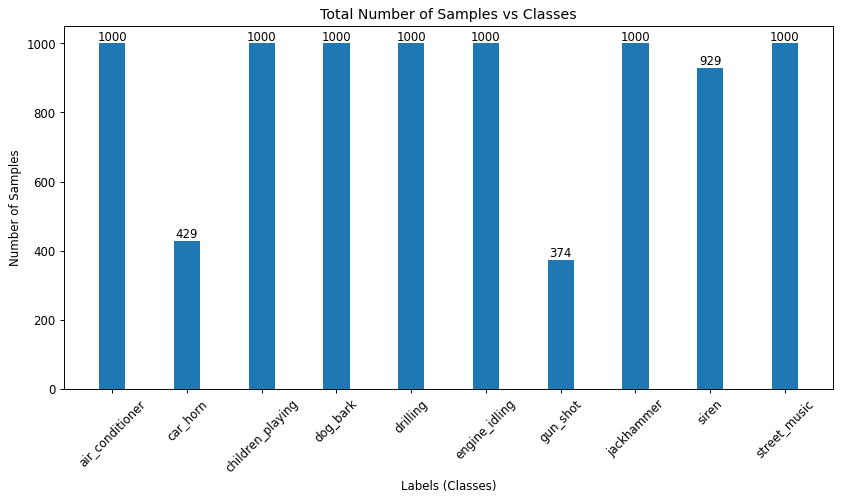

In [13]:
# Plot
classID = metadata.classID.unique().tolist()
classID_sorted = sorted(classID)

plt.figure(figsize=(10, 6), dpi=85)
plt.bar(classID_sorted, sample_counts_sorted, width=0.35)
plt.ylabel("Number of Samples")
plt.xlabel("Labels (Classes)")
plt.title("Total Number of Samples vs Classes")
plt.xticks(classID_sorted, labels_sorted, rotation=45)

for i, v in enumerate(sample_counts_sorted):
    plt.annotate(str(v), xy=(
        classID_sorted[i], sample_counts_sorted[i]), ha='center',
            va='bottom', xytext=(0, 0), textcoords="offset points")

plt.tight_layout()
plt.show()

## Plot Native Sample Rate for 10 Classes

In [14]:
all_sample_rates = metadata["sample_rate"].tolist()
all_classes = metadata["class"].tolist()

# Save indices of all samples with a sample rate value > 44 kHz into a list
high_freq_indices = metadata.index[metadata["sample_rate"] > 44000].tolist()

# Create a new dataframe from all native sample rates and their respective classes
high_freq = {"all_sample_rates": all_sample_rates, "all_classes": all_classes}
high_freq_df = pd.DataFrame.from_dict(high_freq)
high_freq_df

,all_sample_rates,all_classes
0,44100,dog_bark
1,44100,children_playing
2,44100,children_playing
3,44100,children_playing
4,44100,children_playing
...,...,...
8727,44100,car_horn
8728,44100,car_horn
8729,44100,car_horn
8730,44100,car_horn


In [15]:
# Examine one class (e.g. car_horn)
carhorn_df = high_freq_df.loc[high_freq_df['all_classes'] == 'car_horn']

carhorn_sample_rate_counts = carhorn_df.all_sample_rates.value_counts().tolist()
carhorn_native_sample_rates = carhorn_df.all_sample_rates.unique().tolist()

# Sort counts in ascending order of sample rates

carhorn_rates_sorted = sorted(carhorn_native_sample_rates)
carhorn_counts_sorted = [x for _, x in sorted(zip(carhorn_native_sample_rates, carhorn_sample_rate_counts))]

print("Sorted car horn native sample rates:: ", carhorn_rates_sorted)
print("Sorted car horn native sample rate counts: ", carhorn_counts_sorted)

Sorted car horn native sample rates::  [16000, 44100, 48000, 96000]
Sorted car horn native sample rate counts:  [21, 288, 105, 15]


In [16]:
# Create a dictionary to store all native sample rates, their counts and legths for each respective class
all_classes_df = {}

for i in range(len(labels_sorted)):

    all_classes_df[f"{labels_sorted[i]}"] = high_freq_df.loc[high_freq_df['all_classes'] == f"{labels_sorted[i]}"]

    all_classes_df[f"{labels_sorted[i]}_sample_rate_counts"] = (
        all_classes_df[f"{labels_sorted[i]}"].all_sample_rates.value_counts().tolist())

    all_classes_df[f"{labels_sorted[i]}_native_sample_rates"] = (
        all_classes_df[f"{labels_sorted[i]}"].all_sample_rates.unique().tolist())

    all_classes_df[f"{labels_sorted[i]}_rates_sorted"] = (
        sorted(all_classes_df[f"{labels_sorted[i]}_native_sample_rates"]))

    all_classes_df[f"{labels_sorted[i]}_counts_sorted"] = (
        [x for _, x in sorted(
            zip(all_classes_df[f"{labels_sorted[i]}_native_sample_rates"], (
                all_classes_df[f"{labels_sorted[i]}_sample_rate_counts"])))])

    all_classes_df[f"{labels_sorted[i]}_length"] = (
        np.arange(0, len(all_classes_df[f"{labels_sorted[i]}_counts_sorted"])))

In [17]:
# Pad nonoberserved frequencies with zeros for each class
def expand_list(full_list, short_list, counts_list):

    expanded_list = [x if x in short_list else 0 for x in full_list]
    expanded_counts_list = []
    index = 0
    for x in expanded_list:

        if x != 0:
            expanded_counts_list.append(counts_list[index])
            index = index + 1
        else:
            expanded_counts_list.append(0)

    return expanded_list, expanded_counts_list


all_classes = {}
for i in range(len(labels_sorted)):

    all_classes[f"{labels_sorted[i]}_rates_sorted_pad"], (
        all_classes[f"{labels_sorted[i]}_counts_sorted_pad"]) = (
            expand_list(rates_sorted, all_classes_df[f"{labels_sorted[i]}_rates_sorted"],
                        all_classes_df[f"{labels_sorted[i]}_counts_sorted"]))

In [18]:
rate_class = {}
counts_list = []

for i in range(len(labels_sorted)):

    rate_class["sample_rates [Hz]"] = sorted(audiodf["sample_rate"].value_counts().index.tolist())
    counts_list.append(all_classes[f"{labels_sorted[i]}_counts_sorted_pad"])
    rate_class[f"{labels_sorted[i]}"] = counts_list[i]

rate_class_df = pd.DataFrame.from_dict(rate_class)
rate_class_df

,sample_rates [Hz],air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
0,8000,0,0,0,0,0,0,0,0,0,6
1,11024,0,0,8,0,0,0,0,0,0,0
2,11025,0,0,7,10,0,0,0,0,9,0
3,16000,0,21,0,0,17,0,0,0,12,42
4,22050,0,0,7,22,25,0,57,0,0,0
5,24000,0,0,0,4,6,0,0,0,0,12
6,32000,0,0,0,4,0,0,0,0,0,0
7,44100,675,288,590,657,700,523,202,246,506,686
8,48000,325,105,372,215,122,398,113,543,402,204
9,96000,0,15,16,88,102,79,2,211,0,50


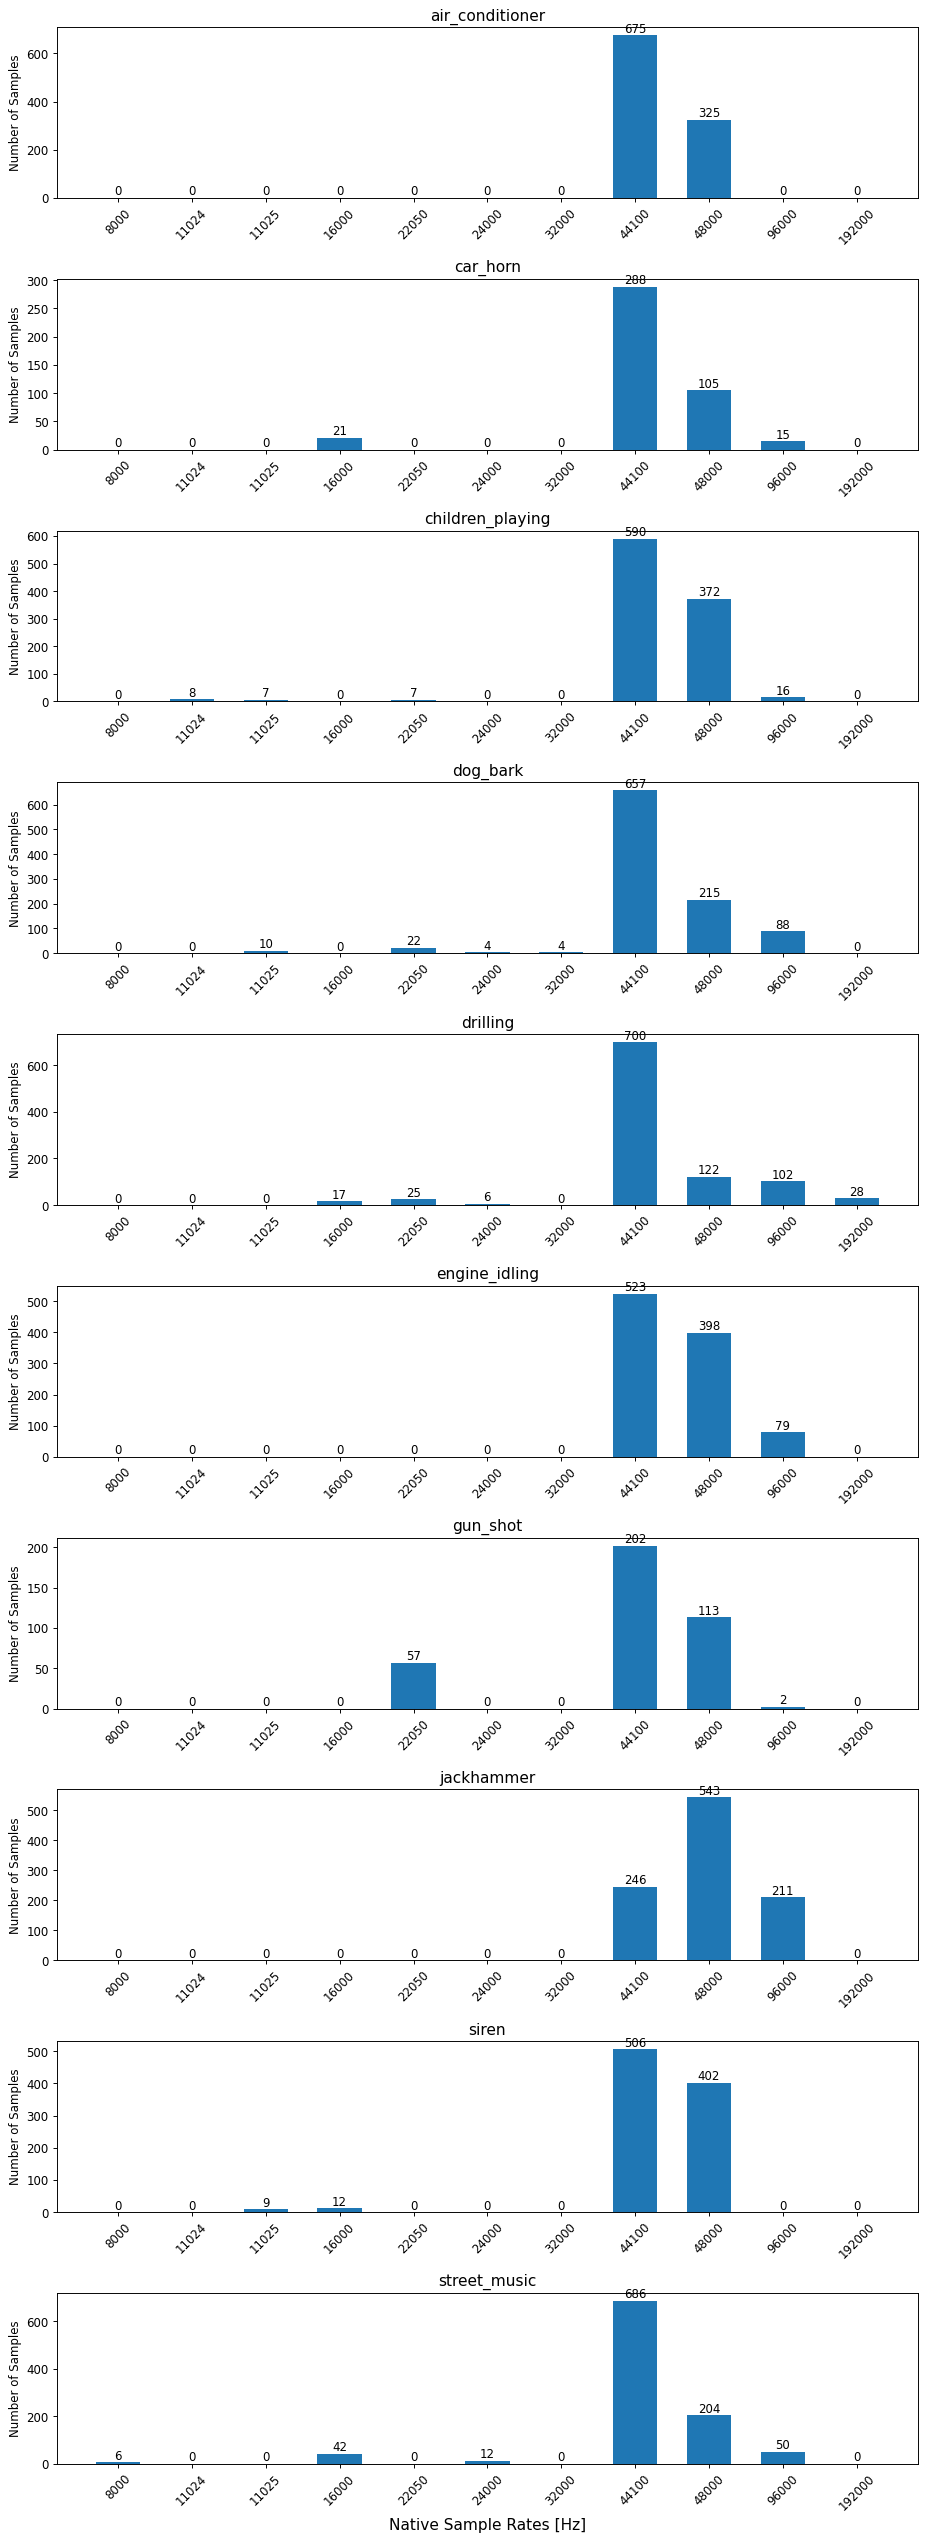

In [19]:
# Plot
fig, axs = plt.subplots(10, figsize=(11, 30), dpi=85)
width = 0.6

for i in range(10):

    plt.tight_layout()
    axs[i].bar(types - width/2, all_classes[f"{labels_sorted[i]}_counts_sorted_pad"], width, align="edge")
    axs[i].set_xticks(types)
    axs[i].set_xticklabels(rates_sorted, rotation=45)
    axs[i].set_title(f"{labels_sorted[i]}", fontsize=13)
    plt.sca(axs[i])
    axs[i].set_ylabel("Number of Samples", fontsize=10)

    for j, v in enumerate(all_classes[f"{labels_sorted[i]}_counts_sorted_pad"]):
        plt.annotate(v, xy=(types[j], (
            all_classes[f"{labels_sorted[i]}_counts_sorted_pad"][j])),
                ha='center', va='bottom', xytext=(0, 0), textcoords="offset points")

    plt.tight_layout()

axs[-1].set_xlabel("Native Sample Rates [Hz]", fontsize=13)
plt.tight_layout()